## This notebook contains all the EDA we have done on the given competition data.

Each section contains plots and a following explanation
    
    These plots, dataframes and tables helped understand the meaning and distribution of data provided

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

# Important Plotting Functions

In [3]:
def facetGridPlotter(data, x, col):
    sns.set(font_scale=1)
    sns.set_style("white")
    p = sns.catplot(
    data=data,
    x=x,
    col= col,
    col_wrap=2,
    kind="count",
    # hue="var",
    sharex=False,
    dodge=False,
    sharey=False,
    )
    for axes in p.axes.flat:
        axes.set_xticklabels(
            axes.get_xticklabels(), rotation=65, horizontalalignment="right"
        )

In [4]:
%%time
train_tran_full = pd.read_csv('../input/frauddetect/train_transaction.csv')
test_tran_full = pd.read_csv('../input/frauddetect/test_transaction.csv')
train_id_full = pd.read_csv('../input/frauddetect/train_identity.csv')
test_id_full = pd.read_csv('../input/frauddetect/test_identity.csv')
train_tran = reduce_mem_usage(train_tran_full)
del train_tran_full
test_tran = reduce_mem_usage(test_tran_full)
del test_tran_full
train_id = reduce_mem_usage(train_id_full)
del train_id_full
test_id = reduce_mem_usage(test_id_full)
del test_id_full
train =  pd.merge(train_tran, train_id, on = 'TransactionID', how = 'left', suffixes = ("", ""));
test = pd.merge(test_tran, test_id, on = 'TransactionID', how = 'left', suffixes = ("", ""))
adversarial_features = ["TransactionID"]
train = train.drop(adversarial_features, axis = 1)
test = test.drop(adversarial_features, axis = 1)
del train_tran
del test_tran
del train_id
del test_id

Mem. usage decreased to 318.65 Mb (70.1% reduction)
Mem. usage decreased to 215.36 Mb (69.6% reduction)
Mem. usage decreased to 15.59 Mb (42.7% reduction)
Mem. usage decreased to 10.27 Mb (42.7% reduction)
CPU times: user 1min 12s, sys: 1min 2s, total: 2min 15s
Wall time: 2min 23s


# EDA on Categorical Columns

1. DeviceType

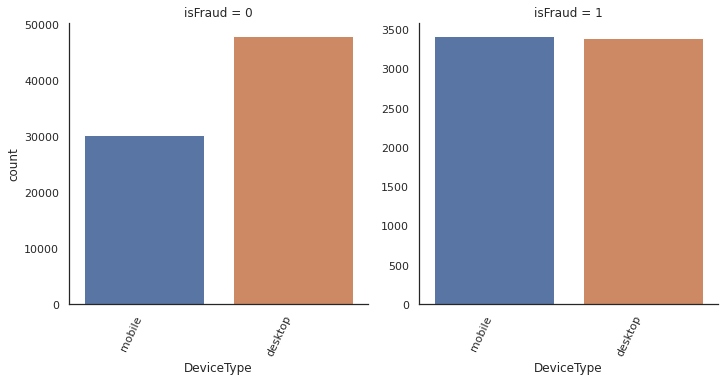

In [5]:
facetGridPlotter(train, "DeviceType", "isFraud")

The plots illustrates that the fraud rate is higher in mobile phones. But does this mean phones are unsafe or whether desktops are ultra safe?

    Desktops are usually present in establishments like stores and hence might be harder to cheat. This calls for a stronger and secure phone transaction amendments.

2. R_emaildomain

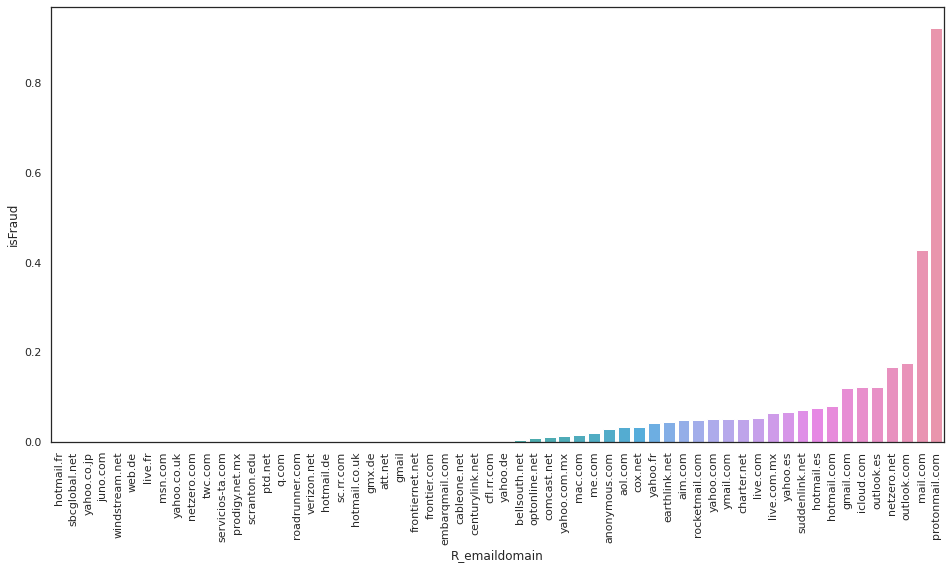

In [6]:
groupedData = train[['R_emaildomain', 'isFraud']].groupby(by = 'R_emaildomain', as_index = False).mean().sort_values(by = 'isFraud', ascending = True)
plt.figure(figsize = (16, 8))
plt.xticks(rotation = 90)
sns.barplot(x = groupedData['R_emaildomain'], y = groupedData['isFraud'])

In [7]:
groupedData

,R_emaildomain,isFraud
22,hotmail.fr,0.000000
43,sbcglobal.net,0.000000
52,yahoo.co.jp,0.000000
24,juno.com,0.000000
51,windstream.net,0.000000
50,web.de,0.000000
27,live.fr,0.000000
31,msn.com,0.000000
53,yahoo.co.uk,0.000000
32,netzero.com,0.000000


It is clearly visible that many R_emaildomain categories have 0 fraud rate, these have been looked at cardinality reduction section in the main notebook

# EDA on Numerical Columns

1. TransactionAmt
        
        The values are right skewed. This is a natural phenomenon as few transactions have high denominations.
        When training a simple linear models, this skew can be removed using techniues like 1.5 IQR.

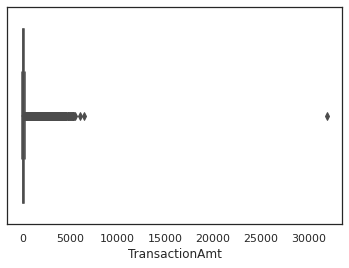

In [9]:
sns.boxplot(train['TransactionAmt'])

## Finding relation between addr1 & addr2

In [10]:
print(train['addr1'].isnull().value_counts())
print(train['addr2'].isnull().value_counts())

False    314842
True      39482
Name: addr1, dtype: int64
False    314842
True      39482
Name: addr2, dtype: int64


In [11]:
train.fillna(-999).corrwith(train['addr2'].fillna(-999))['addr1']

0.9730994085484485

In [12]:
display(train['addr1'].value_counts())
display(train['addr2'].value_counts())

299.0    27616
325.0    25577
204.0    25119
264.0    23887
330.0    15836
         ...  
326.0        1
237.0        1
328.0        1
329.0        1
206.0        1
Name: addr1, Length: 271, dtype: int64

87.0     312252
60.0       1796
96.0        407
32.0         54
65.0         51
          ...  
18.0          1
100.0         1
101.0         1
94.0          1
89.0          1
Name: addr2, Length: 64, dtype: int64

In [13]:
display(np.count_nonzero(train['addr1'].unique()))
display(np.count_nonzero(train['addr2'].unique()))

272

65

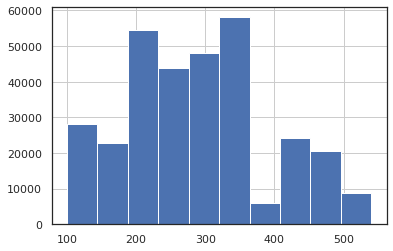

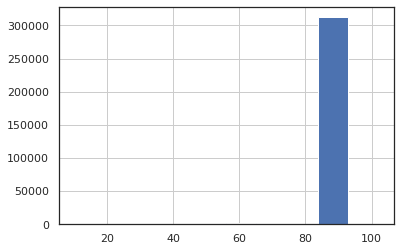

In [14]:
train['addr1'].hist()
plt.show()

train['addr2'].hist()
plt.show()

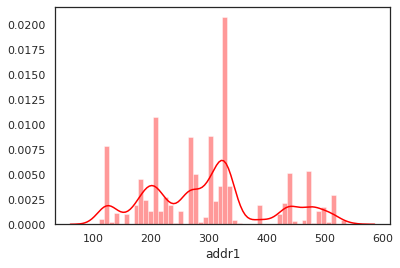

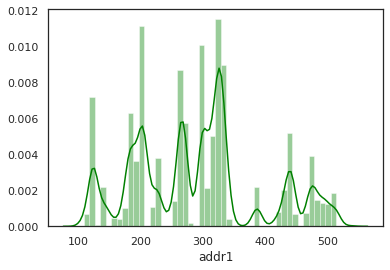

In [15]:
sns.distplot(train.loc[train['isFraud'] == 1]['addr1'], bins=50, color = 'red')
plt.show()

sns.distplot(train.loc[train['isFraud'] == 0]['addr1'], bins=50, color = 'green')
plt.show()

In [16]:
grp_addr = train.groupby(['addr2'])['addr1']
print(grp_addr.value_counts().sort_values(ascending=False))

addr2  addr1
87.0   299.0    27607
       325.0    25574
       204.0    25118
       264.0    23887
       330.0    15835
                ...  
71.0   162.0        1
70.0   296.0        1
66.0   506.0        1
       402.0        1
75.0   296.0        1
Name: addr1, Length: 358, dtype: int64


### Conclusion:
* addr1 and addr2 are definitely related (can be inferred from the null value and correlation value)
* addr2 is heavily concentrated for value 87.
* Both addr1 and addr2 are categorical label encoded values
* Since addr1 has much lesser unique values than addr2, we believe addr1 to represent something like the country and for addr2 to represent a region.

## card columns

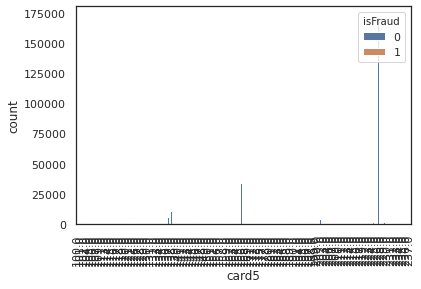

In [17]:
# for i in train.columns:
#     if i in ['card1', 'card2', 'card3', 'card5']:
sns.countplot(x= 'card5', hue = "isFraud", data=train)
plt.xticks(rotation = 90)
plt.show()

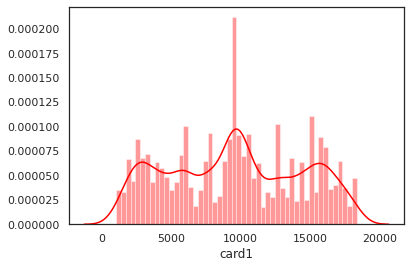

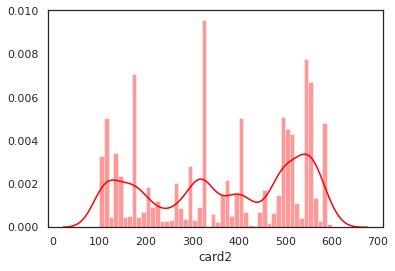

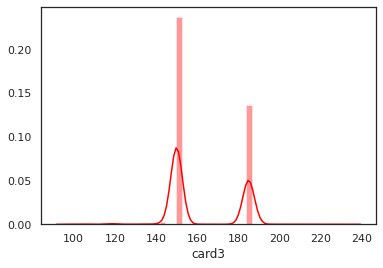

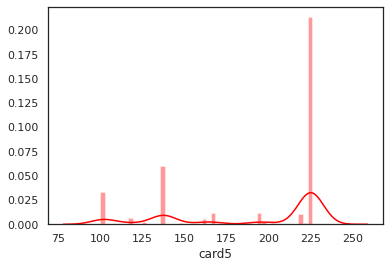

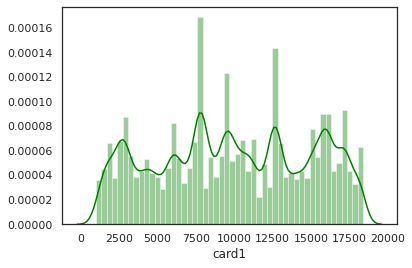

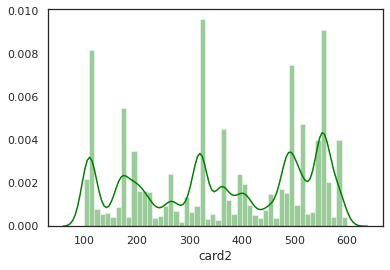

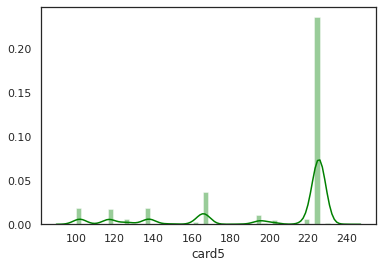

In [18]:
for i in train.columns:
    if i in ['card1', 'card2', 'card3', 'card5']:
        sns.distplot(train.loc[train['isFraud'] == 1][i], bins=50, color = 'red')
        plt.show()
        
for i in train.columns:
    if i in ['card1', 'card2', 'card5']:
        sns.distplot(train.loc[train['isFraud'] == 0][i], bins=50, color = 'green')
        plt.show()


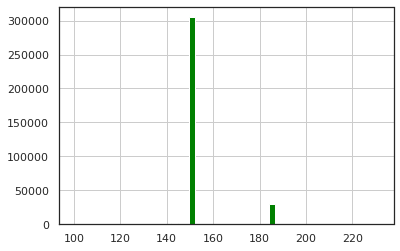

In [19]:
train.loc[train['isFraud'] == 0]['card3'].hist(bins=50, color = 'green')
plt.show()

### Conclusion:

By looking at card1’s distplot and it’s high number of unique values, we can determine that card1 is something like the user’s/bank’s card identification number

## D columns

Viewing the correlation matrix to see which D columns are redundant or might be related to one another

In [20]:
D_train = train.loc[:, 'D1':'D15']
display(D_train.corr())

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
D1,1.000000,0.981201,0.280570,0.584009,0.057736,0.524516,0.213144,0.053884,0.006171,0.561348,0.591286,0.519643,0.364354,0.154772,0.638111
D2,0.981201,1.000000,0.266293,0.567691,0.240680,0.603242,0.456149,0.272901,0.040145,0.524542,0.560223,0.668942,0.384475,0.194072,0.616414
D3,0.280570,0.266293,1.000000,0.148433,0.709437,0.312443,0.815608,0.202837,0.014368,0.089736,0.055497,0.352581,0.138047,0.032407,0.136811
D4,0.584009,0.567691,0.148433,1.000000,0.312779,0.959022,0.581068,0.163411,0.043194,0.635541,0.656823,1.000000,0.386854,0.141423,0.749823
D5,0.057736,0.240680,0.709437,0.312779,1.000000,0.557126,0.985465,0.257232,0.032492,0.115148,0.061385,0.572366,0.132763,0.064122,0.186431
D6,0.524516,0.603242,0.312443,0.959022,0.557126,1.000000,0.516344,0.190698,0.039383,0.464562,NaN,0.976946,0.421004,0.218203,0.694112
D7,0.213144,0.456149,0.815608,0.581068,0.985465,0.516344,1.000000,0.231704,0.020938,0.108284,NaN,0.561842,0.119098,0.032200,0.285453
D8,0.053884,0.272901,0.202837,0.163411,0.257232,0.190698,0.231704,1.000000,0.062559,0.183362,NaN,0.158572,0.527916,0.088385,0.230410
D9,0.006171,0.040145,0.014368,0.043194,0.032492,0.039383,0.020938,0.062559,1.000000,0.064922,NaN,0.028717,0.023409,0.040335,0.051773
D10,0.561348,0.524542,0.089736,0.635541,0.115148,0.464562,0.108284,0.183362,0.064922,1.000000,0.610959,0.009317,0.288901,0.344702,0.714106


trying to check if any visible relation exists between D1 and D2 values

In [21]:
grp_D1 = D_train.groupby(['D1'])
display(grp_D1['D2'].value_counts().sort_index(ascending=False))

D1     D2   
640.0  640.0      10
639.0  639.0      22
       634.0       1
       630.0       2
638.0  638.0      23
                ... 
2.0    1.0        37
       0.0        24
1.0    1.0      3645
       0.0        77
0.0    0.0      8555
Name: D2, Length: 9975, dtype: int64

trying to check if any visible relation exists between D3,D7, and D5 values

In [22]:
grp_D3 = D_train.groupby(['D3'])
display(grp_D3['D7'].value_counts().sort_index(ascending=False))
display(grp_D3['D5'].value_counts().sort_index(ascending=False))

D3     D7   
691.0  52.0        1
633.0  0.0         1
610.0  0.0         1
574.0  123.0       1
565.0  565.0       1
                ... 
0.0    4.0         7
       3.0        11
       2.0        13
       1.0        17
       0.0      7986
Name: D7, Length: 1721, dtype: int64

D3     D5   
731.0  731.0        1
729.0  729.0        1
692.0  297.0        1
691.0  52.0         1
651.0  0.0          1
                ...  
0.0    4.0         91
       3.0        138
       2.0        186
       1.0        302
       0.0      29778
Name: D5, Length: 11304, dtype: int64

trying to check if any visible relation exists between D4, D6, and D12 values

In [23]:
grp_D4 = D_train.groupby(['D4'])
display(grp_D4['D6'].value_counts().sort_index(ascending=False))
display(grp_D4['D12'].value_counts().sort_index(ascending=False))
len(D_train['D12'].dropna().unique())

D4      D6    
 855.0   489.0        1
 843.0   843.0        1
 833.0   0.0          1
 828.0   115.0        1
 825.0   731.0        1
                  ...  
 0.0     3.0          1
         1.0          1
         0.0      26846
-74.0   -74.0         1
-83.0   -83.0         1
Name: D6, Length: 1088, dtype: int64

D4      D12   
 648.0   648.0        5
 644.0   644.0        1
 640.0   640.0        1
 635.0   635.0        1
 634.0   634.0        3
                  ...  
 2.0     2.0        503
 1.0     1.0        893
 0.0     0.0      25666
-74.0   -74.0         1
-83.0   -83.0         1
Name: D12, Length: 615, dtype: int64

616

trying to check if any visible relation exists between D5 and D7 values

In [24]:
grp_D5 = D_train.groupby(['D5'])
display(grp_D5['D7'].value_counts().sort_index(ascending=False))

D5     D7   
801.0  801.0        1
757.0  757.0        1
745.0  745.0        1
733.0  733.0        2
731.0  731.0        1
                ...  
0.0    182.0        1
       87.0         1
       2.0          2
       1.0          1
       0.0      11482
Name: D7, Length: 630, dtype: int64

### Conclusion:
1. D2 is very similar to D1 and can be removed(based on which has higher Nan values)
1. D6 is extremely similar to D4 but some extra values can be seen at a glance
1. D12 is almost same as D4 but with more NaNs

# Columns which we thought might hold less significance

getting a list of columns which have either of the following:
1. \>98% of its values as null
1. \>95% of its values being one particular entry (Very high skew)
1. Only one unique value existing
    
        These are not hard thresholds but must be analysed from the data given.
        In the highly skewed data, if the minority class has significant impact on target variable then such features must not be eliminated.
        These points can be checked using techniques like groupby.
   

list of such columns in train

In [25]:
majority_null_columns_train = []
huge_majority_rule_columns_train = []
one_or_none_value_columns_train = []
for i in train.columns:
    if train[i].isnull().sum()/train.shape[0]>0.98:
        majority_null_columns_train.append(i)
    if train[i].dtype!='object':
        if train[i].value_counts(dropna=False, normalize=True).values[0]>0.95:
            huge_majority_rule_columns_train.append(i)
    if train[i].nunique()<=1:
        one_or_none_value_columns_train.append(i)

print(majority_null_columns_train)
print(len(majority_null_columns_train))
print()

print(huge_majority_rule_columns_train)
print(len(huge_majority_rule_columns_train))
print()

print(one_or_none_value_columns_train)
print(len(one_or_none_value_columns_train))
print()

drop_train_columns = list(set(majority_null_columns_train + huge_majority_rule_columns_train + one_or_none_value_columns_train))
print(drop_train_columns)
print(len(drop_train_columns))

['id_07', 'id_08', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']
9

['isFraud', 'C3', 'V104', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V125', 'V135', 'V281', 'V286', 'V297', 'V300', 'V301', 'V305', 'V311', 'V319', 'id_07', 'id_08', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26']
37

[]
0

['V121', 'V311', 'V281', 'id_22', 'V112', 'V123', 'V301', 'V113', 'V111', 'V305', 'V135', 'id_08', 'id_27', 'V114', 'isFraud', 'V297', 'V300', 'id_07', 'V115', 'C3', 'id_24', 'id_26', 'V119', 'id_23', 'V108', 'V120', 'V125', 'V116', 'V319', 'V117', 'id_25', 'V118', 'V109', 'V286', 'V110', 'id_21', 'V107', 'V122', 'V104']
39


list of such columns in test

In [26]:
majority_null_columns_test = []
huge_majority_rule_columns_test = []
one_or_none_value_columns_test = []
for i in test.columns:
    if test[i].isnull().sum()/test.shape[0]>0.9:
        majority_null_columns_test.append(i)
    if test[i].dtype!='object':
        if test[i].value_counts(dropna=False, normalize=True).values[0]>0.91:
            huge_majority_rule_columns_test.append(i)
    if test[i].nunique()<=1:
        one_or_none_value_columns_test.append(i)

print(majority_null_columns_test)
print(len(majority_null_columns_test))
print()

print(huge_majority_rule_columns_test)
print(len(huge_majority_rule_columns_test))
print()

print(one_or_none_value_columns_test)
print(len(one_or_none_value_columns_test))
print()

drop_test_columns = list(set(majority_null_columns_test + huge_majority_rule_columns_test + one_or_none_value_columns_test))
print(drop_test_columns)
print(len(drop_test_columns))

['dist2', 'D7', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']
12

['dist2', 'C3', 'D7', 'V98', 'V101', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V129', 'V132', 'V134', 'V135', 'V136', 'V137', 'V281', 'V284', 'V286', 'V290', 'V293', 'V297', 'V298', 'V299', 'V300', 'V301', 'V305', 'V309', 'V311', 'V316', 'V319', 'V320', 'V321', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26']
59

['V305']
1

['V121', 'V311', 'V281', 'id_22', 'V112', 'V123', 'V316', 'V301', 'V106', 'V113', 'V320', 'V111', 'V305', 'V135', 'V299', 'id_08', 'V309', 'V298', 'dist2', 'id_27', 'V124', 'V136', 'V114', 'V101', 'V297', 'V300', 'id_07', 'V115', 'C3', 'V103', 'id_24', 'id_26', 'V134', 'V321', 'V119', 'id_23', 'V132', 'id_18', 'V108', 'V120', 'V137', 'V125', 'V116', 'V319', 'V117', 'D7', 'id_25', 'V293', 'V118'

union of the two lists from train and test

In [27]:
drop_columns = list(set(drop_train_columns + drop_test_columns))
print(drop_columns)
print(len(drop_columns))

['V121', 'V311', 'V281', 'id_22', 'V112', 'V123', 'V316', 'V301', 'V113', 'V106', 'V320', 'V111', 'V305', 'V135', 'V299', 'id_08', 'V309', 'V298', 'dist2', 'id_27', 'V124', 'V136', 'V114', 'isFraud', 'V297', 'V300', 'id_07', 'V115', 'C3', 'V101', 'id_24', 'V103', 'id_26', 'V134', 'V321', 'V119', 'id_23', 'V132', 'V108', 'id_18', 'V104', 'V120', 'V137', 'V125', 'V319', 'V117', 'D7', 'id_25', 'V293', 'V118', 'V109', 'V286', 'V290', 'V110', 'id_21', 'V107', 'V284', 'V122', 'V98', 'V129', 'V105', 'V116']
62


## Conclusion:
The following columns might hold less importance since, they are either heavily imbalanced or have majority (>95%) null values.
However, it needs to be cross-verified before confirming.